
### Q1: How is the bike share business in San Francisco performing over time?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
sns.set_palette("deep")


In [506]:
sf = pd.read_csv('sf.csv')
sf = sf.dropna(subset=['duration']) 
sf['duration'] = sf['duration'].astype('int64')
sf.head()

,trip_id,start_date,start_station_name,end_station_name,duration,year,day,hour,weekday,bike_number,subscriber_type,age,gender,region_id
0,29332018043022031900,2018-04-30,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,6,2018,04-30,22,2,2933,Subscriber,30.0,Female,3.0
1,3502018043020445900,2018-04-30,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,8,2018,04-30,20,2,350,Subscriber,30.0,Female,3.0
2,11142018043019445400,2018-04-30,The Embarcadero at Sansome St,The Embarcadero at Sansome St,7,2018,04-30,19,2,1114,Customer,28.0,Male,3.0
3,21932018043019381600,2018-04-30,5th St at Brannan St,The Embarcadero at Sansome St,17,2018,04-30,19,2,2193,Subscriber,28.0,Male,3.0
4,24152018043019133000,2018-04-30,Berry St at 4th St,The Embarcadero at Sansome St,18,2018,04-30,19,2,2415,Subscriber,45.0,Male,3.0


# add price

Text(0.5, 1.0, 'Trip Count by Subscriber Type each Year')

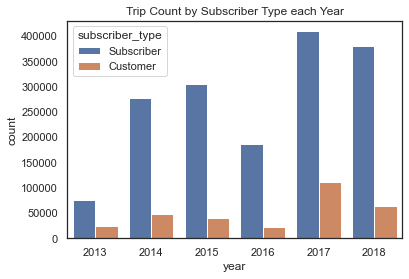

In [507]:
ax = sns.countplot(x="year", hue="subscriber_type", data=sf)
ax.set_title('Trip Count by Subscriber Type each Year')


Text(0.5, 1.0, 'Daily Trip Count by Year')

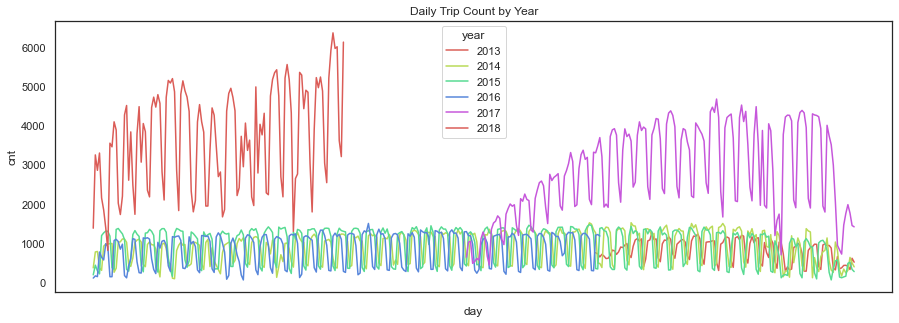

In [508]:
plt.figure(figsize=(15, 5))
trip_by_year_df = sf.groupby(['day', 'year']).size().reset_index(name='cnt')
ax = sns.lineplot(data=trip_by_year_df, x="day",
                  y="cnt", hue="year", palette='hls')
ax.set(xticklabels=[])
ax.set_title('Daily Trip Count by Year')


Text(0.5, 1.0, 'Used Facility each Year')

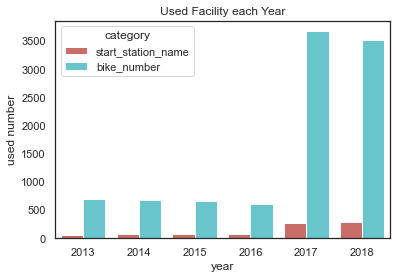

In [509]:
year_uni_df = sf.groupby(['year']).nunique().reset_index()
bike_station_df = year_uni_df[['year', 'start_station_name', 'bike_number']].melt(
    'year', var_name='category',  value_name='used number')
ax = sns.barplot(x="year", y="used number", hue='category',
                 data=bike_station_df, palette='hls')
ax.set_title('Used Facility each Year')


Text(0.5, 1.0, 'Trip Duration Count by Year')

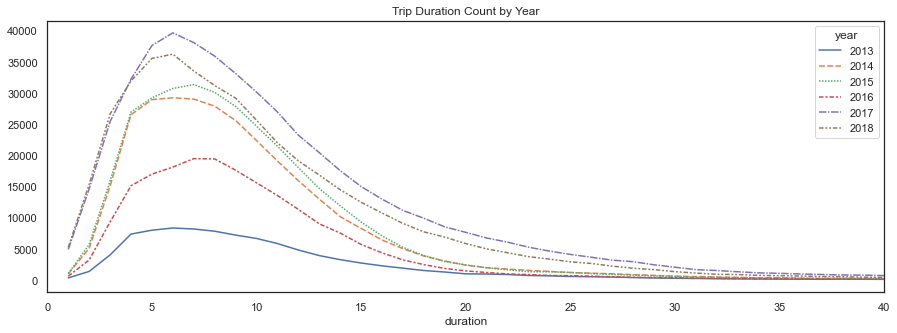

In [510]:
duration_df = sf.groupby(['duration', 'year']).size().unstack()
plt.figure(figsize=(15, 5))
ax = sns.lineplot(data=duration_df )
ax.set(xlim=(0, 40))
ax.set_title('Trip Duration Count by Year')


In [511]:
# creating index list that is ordered by region
index_df = sf[['start_station_name', 'region_id']
].drop_duplicates().sort_values(by='region_id')
index_list = index_df['start_station_name'].to_list()


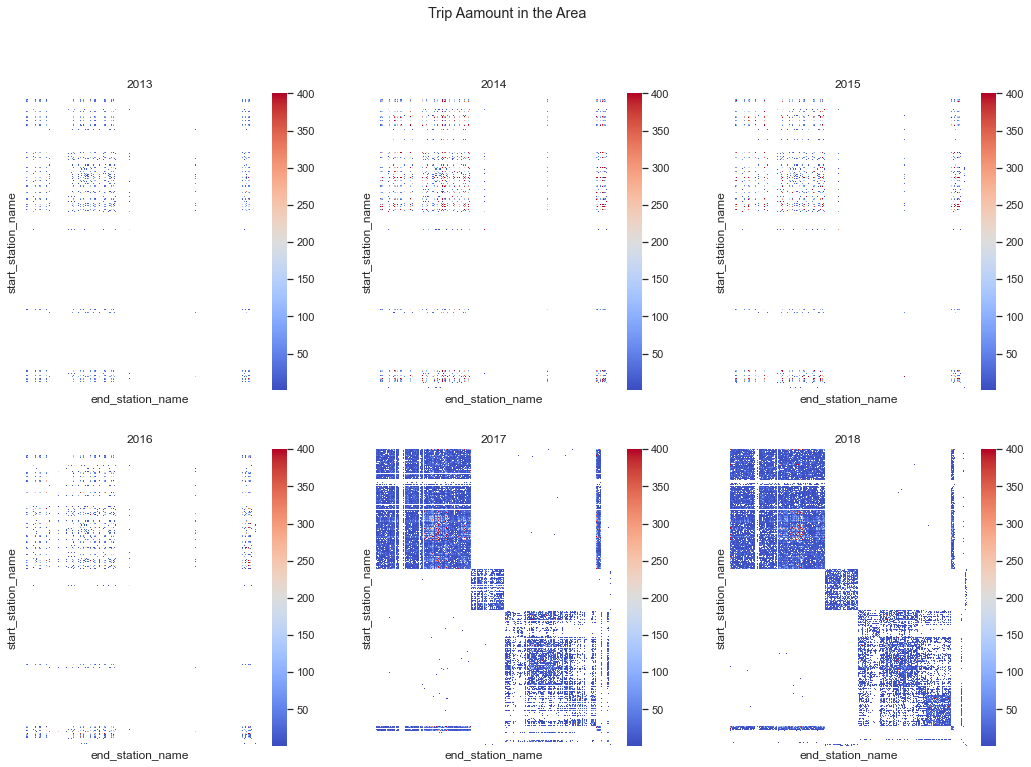

In [512]:
# heatmap of station
fig = plt.figure(figsize=(18, 12))
fig.suptitle('Trip Aamount in the Area')
for i in range(6):
    plt.subplot(2, 3, i + 1)
    heat_df = sf.query(f'year == 201{i + 3}').groupby(
        ['start_station_name', 'end_station_name']).size().unstack()
    heat_df = heat_df.reindex(index=index_list).reindex(columns=index_list)
    ax = sns.heatmap(heat_df, xticklabels=False, yticklabels=False,
                     vmax=400, cmap="coolwarm").set_title(f'201{i + 3}')


### Q2: What are your observations when you compare bike share users in San Francisco with bike share users in New York?

Text(0.5, 1.0, 'Seasonal Pattern by Subscriber Type San Francisco')

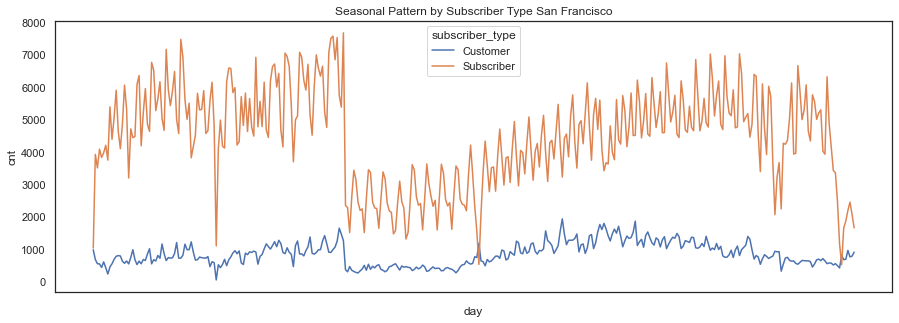

In [513]:
plt.figure(figsize=(15, 5))
weekday_df = sf.groupby(['day', 'subscriber_type']
                        ).size().reset_index(name='cnt')
ax = sns.lineplot(data=weekday_df, x="day", y="cnt", hue="subscriber_type")
ax.set(xticklabels=[])
ax.set_title('Seasonal Pattern by Subscriber Type San Francisco')


Text(0.5, 1.0, 'Adjusted Seasonal Pattern by Subscriber Type San Francisco')

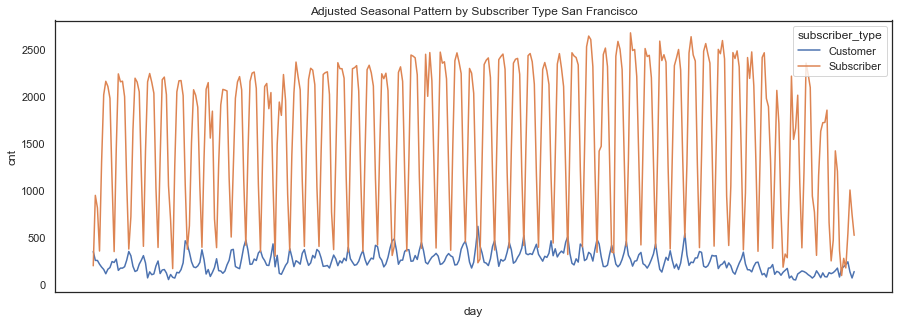

In [514]:
# only 2014 2015
fullyear_df = sf.query('year == 2015| year == 2014')
plt.figure(figsize=(15, 5))
weekday_df = fullyear_df.groupby(
    ['day', 'subscriber_type']).size().reset_index(name='cnt')
ax = sns.lineplot(data=weekday_df, x="day", y="cnt", hue="subscriber_type")
ax.set(xticklabels=[])
ax.set_title('Adjusted Seasonal Pattern by Subscriber Type San Francisco')


Text(0.5, 1.0, 'Adjusted Seasonal Pattern by Subscriber Type New York')

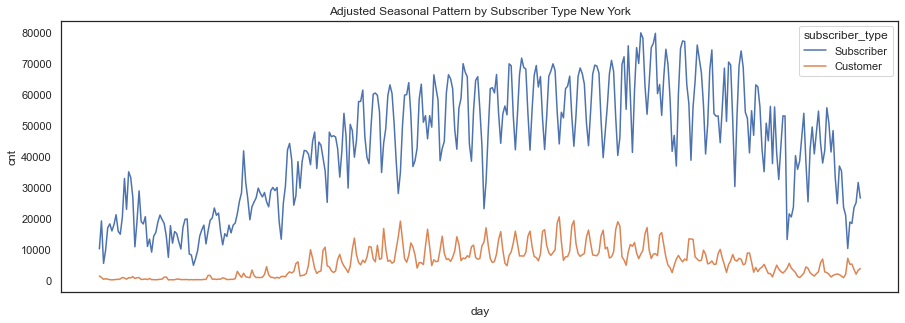

In [515]:
ny1 = pd.read_csv('ny1.csv').sort_values("day")

plt.figure(figsize=(15, 5))

ax = sns.lineplot(data=ny1, x="day", y="cnt", hue="subscriber_type", ci=None)
ax.set(xticklabels=[])
ax.set_title('Adjusted Seasonal Pattern by Subscriber Type New York')

Text(0.5, 1.0, 'Weekday Pattern by Subscriber Type San Francisco')

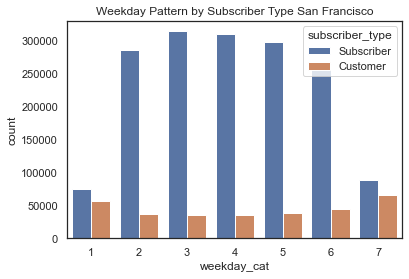

In [516]:
sf['weekday_cat'] = sf['weekday'].astype('category')
ax = sns.countplot(data=sf, x="weekday_cat", hue="subscriber_type")
ax.set_title('Weekday Pattern by Subscriber Type San Francisco')


Text(0.5, 1.0, 'Weekday Pattern by Subscriber Type New York')

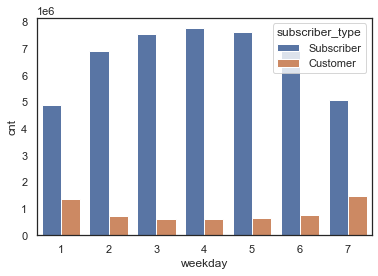

In [517]:
ny2 = pd.read_csv('ny2.csv').dropna(subset=['weekday']).astype({'weekday': 'int32'})
x = sns.barplot(data=ny2, x="weekday", y="cnt", hue="subscriber_type")
ax.set_title('Weekday Pattern by Subscriber Type New York')

Text(0.5, 1.0, 'Hourly Pattern by Subscriber Type San Francisco')

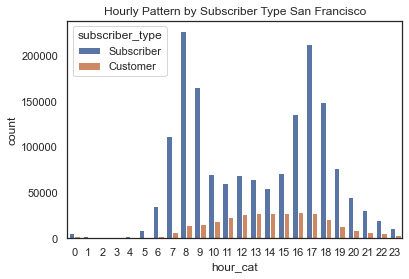

In [518]:
sf['hour_cat'] = sf['hour'].astype('category')
ax = sns.countplot(data=sf, x="hour_cat", hue="subscriber_type")
ax.set_title('Hourly Pattern by Subscriber Type San Francisco')


Text(0.5, 1.0, 'Hourly Pattern by Subscriber Type New York')

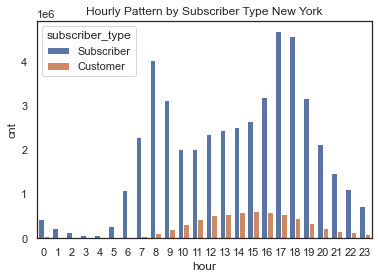

In [519]:
ny3 = pd.read_csv('ny3.csv').dropna(subset=['hour']).astype({'hour': 'int32'})
ax = sns.barplot(data=ny3, x="hour", y='cnt', hue="subscriber_type")
ax.set_title('Hourly Pattern by Subscriber Type New York')


In [520]:
demo_df = sf.groupby(['age', 'gender']).size().unstack().reset_index()
demo_df['age'] = demo_df['age'].astype('int64').astype('category')


(0.0, 60.0)

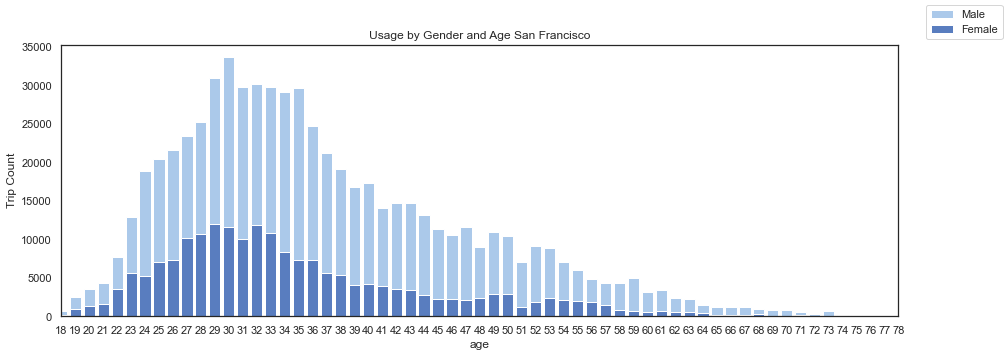

In [521]:
demo_df = sf.groupby(['age', 'gender']).size().unstack().reset_index()
demo_df['age'] = demo_df['age'].astype('int64').astype('category')

ax = plt.figure(figsize=(15, 5))
sns.set_color_codes("pastel")
sns.barplot(x='age', y='Male', data=demo_df, label='Male', color="b")
sns.set_color_codes("muted")
sns.barplot(x='age', y='Female', data=demo_df, label='Female', color="b")

ax.legend()
plt.ylabel('Trip Count')
plt.title('Usage by Gender and Age San Francisco')
plt.xlim(0, 60)

(0.0, 60.0)

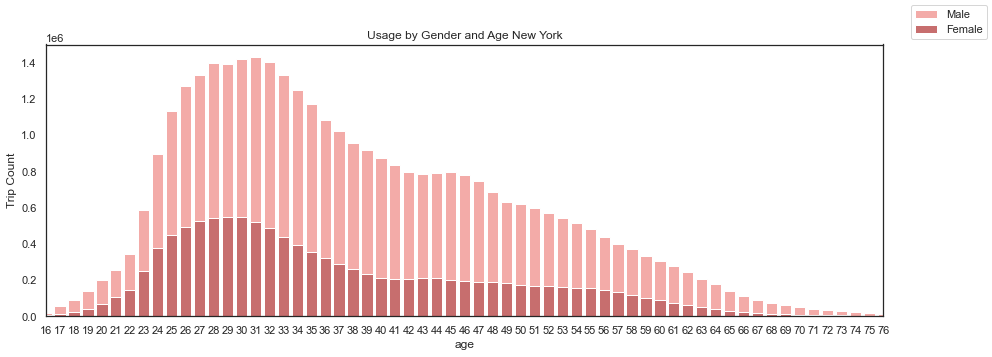

In [522]:
ny4 = pd.read_csv('ny4.csv').dropna(subset=['age']).astype({'age': 'int32'})
ny4 = ny4.pivot( index='age', columns='gender', values='cnt').reset_index()

ax = plt.figure(figsize=(15, 5))
sns.set_color_codes("pastel")
sns.barplot(x='age', y='male', data=ny4, label='Male', color="r")
sns.set_color_codes("muted")
sns.barplot(x='age', y='female', data=ny4, label='Female', color="r")

ax.legend()
plt.ylabel('Trip Count')
plt.title('Usage by Gender and Age New York')
plt.xlim(0, 60)